Shape of dataframe : (39717, 111)
Printing few rows of the data set : 
          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 p

39498   NaN
39499   NaN
39500   NaN
39501   NaN
39502   NaN
39503   NaN
39504   NaN
39505   NaN
39506   NaN
39507   NaN
Name: pub_rec_bankruptcies, dtype: float64
Number of missing values per column : 
 id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         9
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                  

Histogram for for univariate analysis - categorical variables


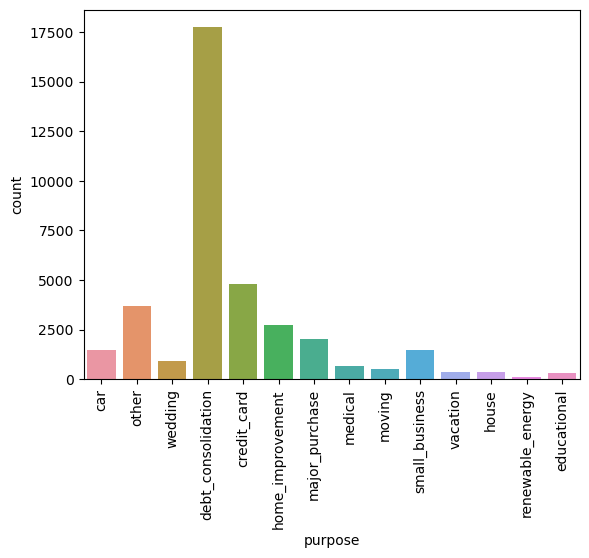

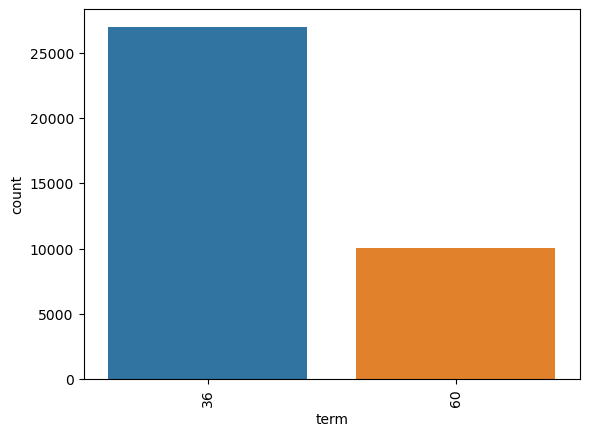

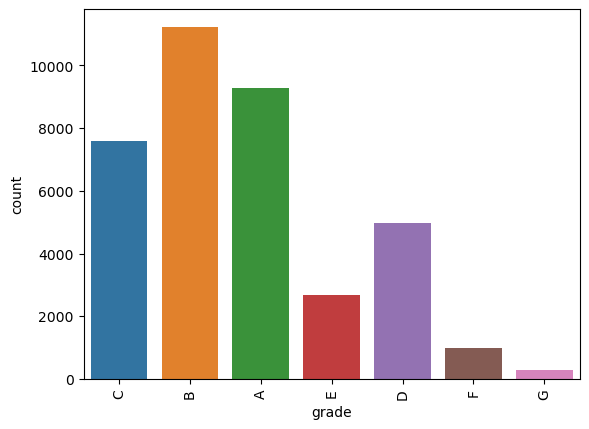

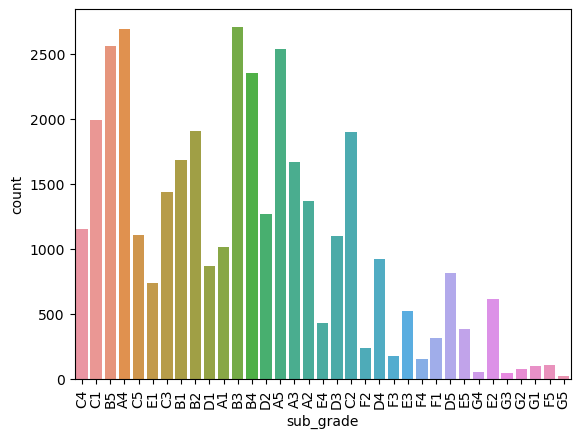

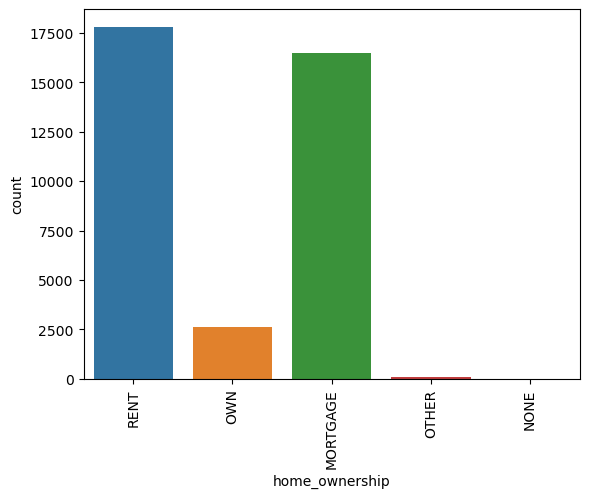

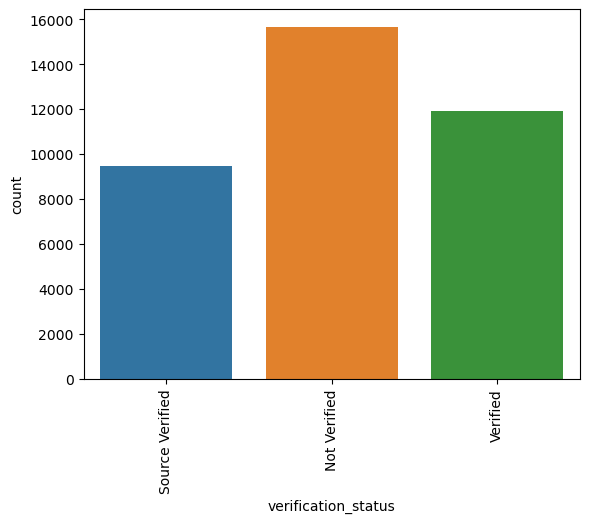

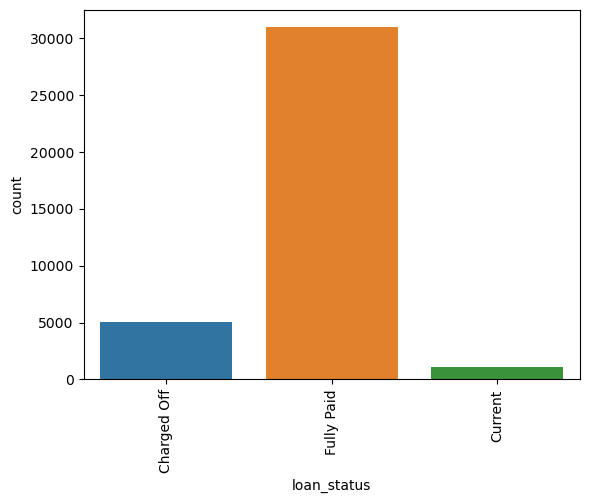

Histogram for for univariate analysis - categorical variables
None


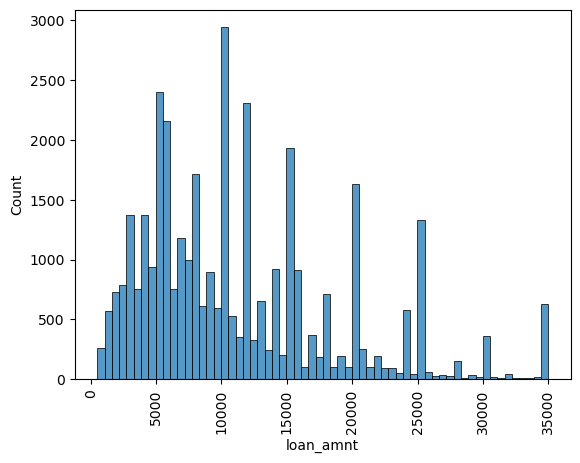

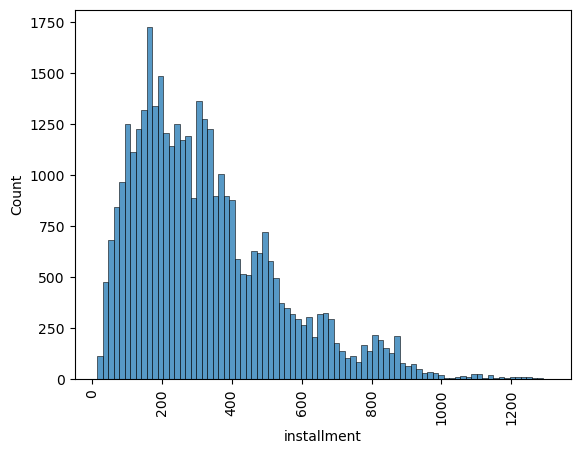

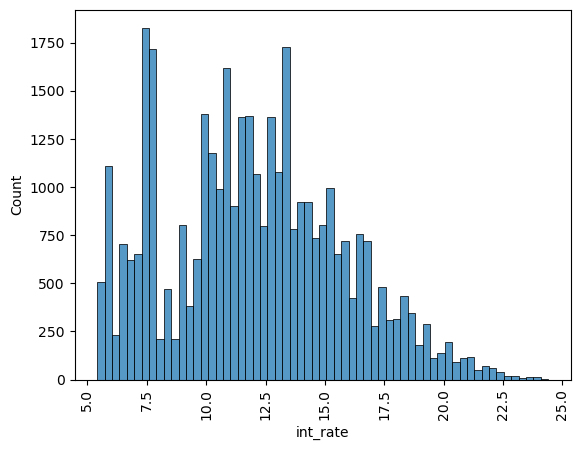

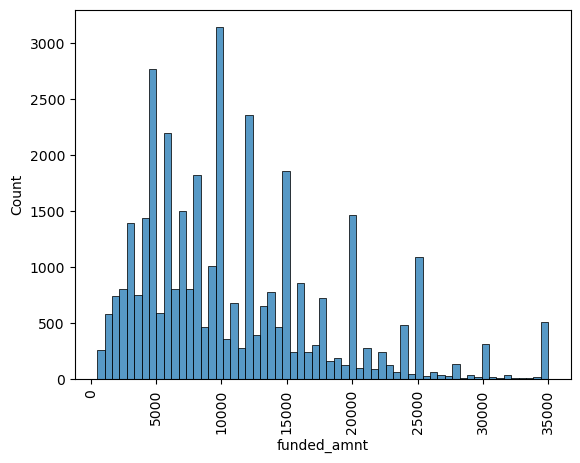

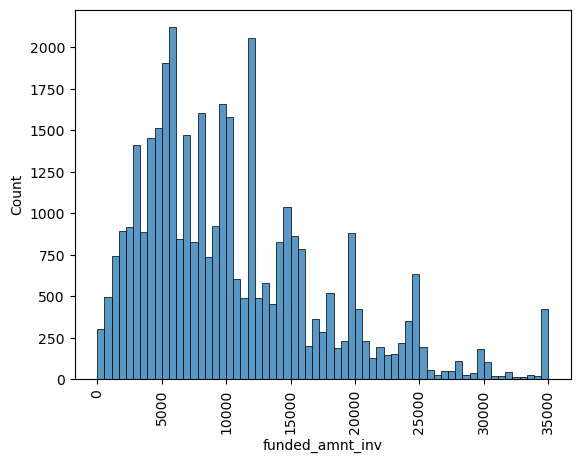

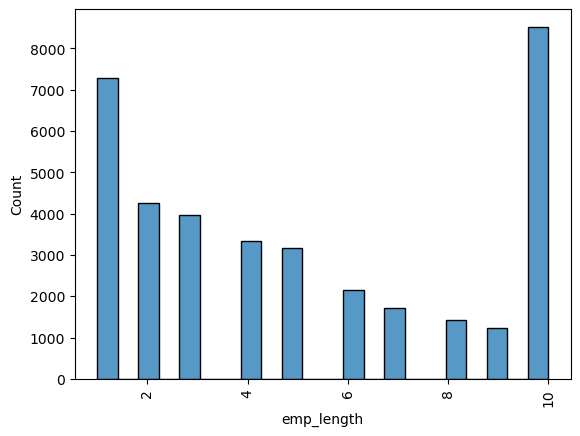

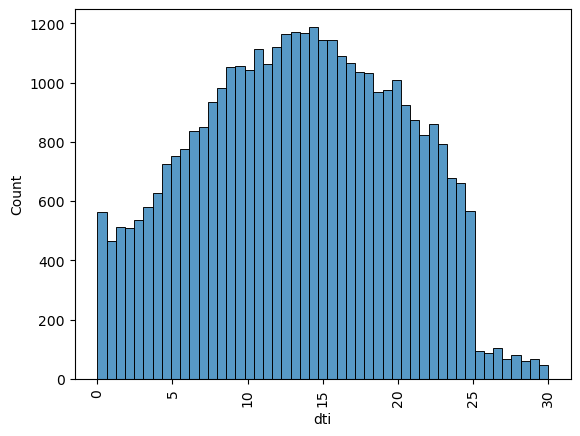

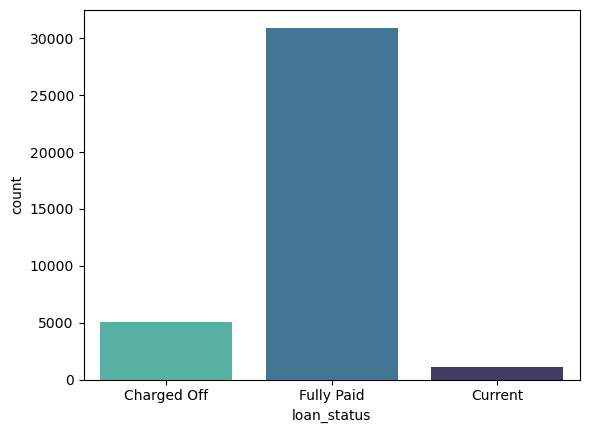

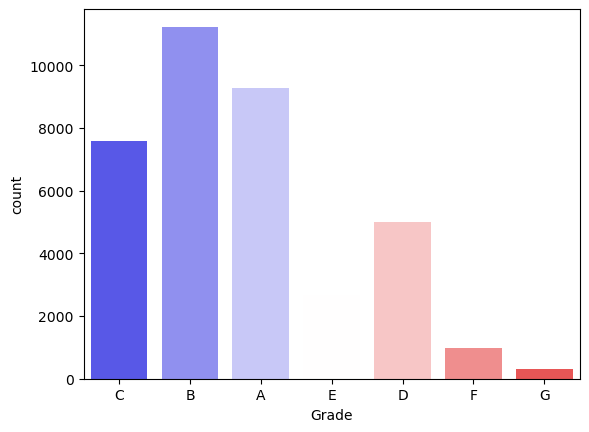

Shape of fully paid : 
 (30933, 50)
Shape of charged_off : 
 (5050, 50)
Number loan defaulters : 5050  % loa defaulters : 13.630597317066586 


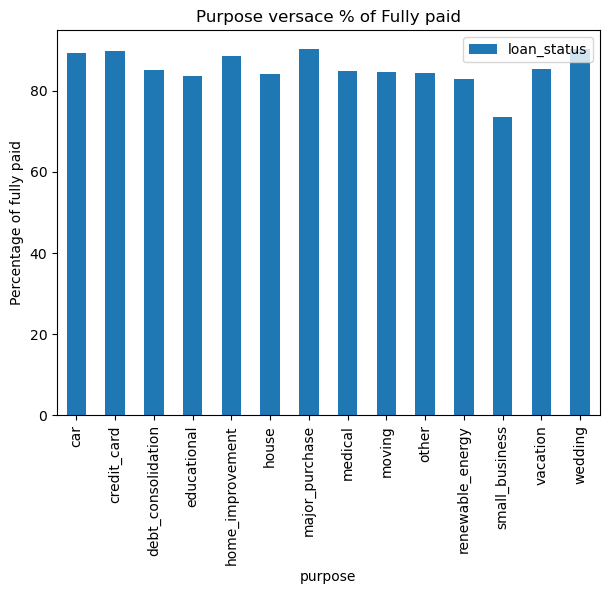

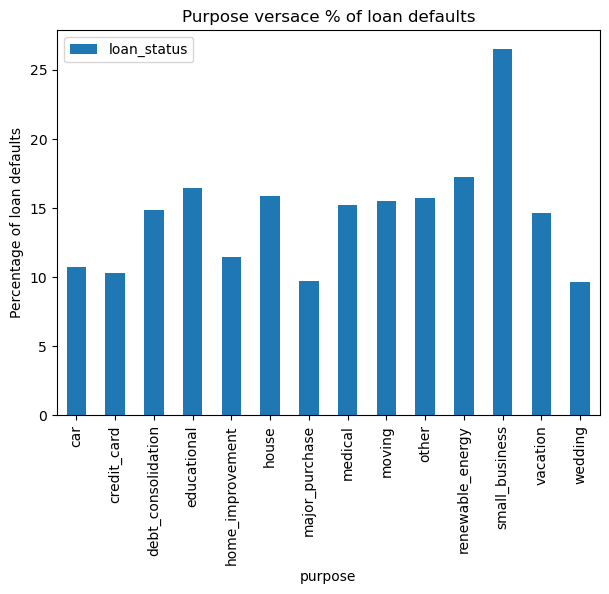

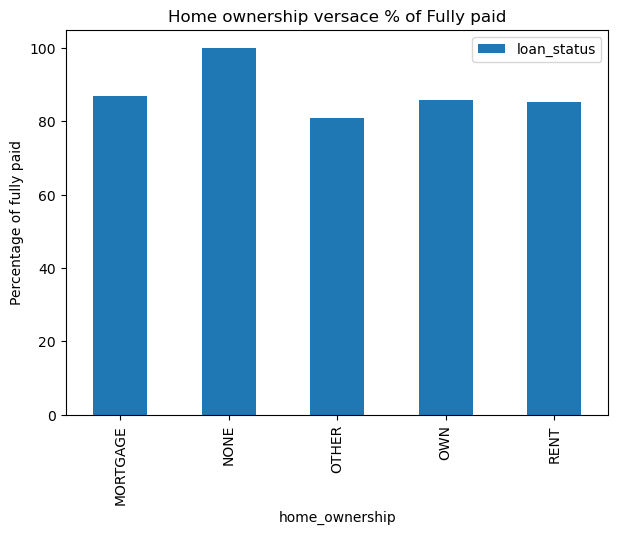

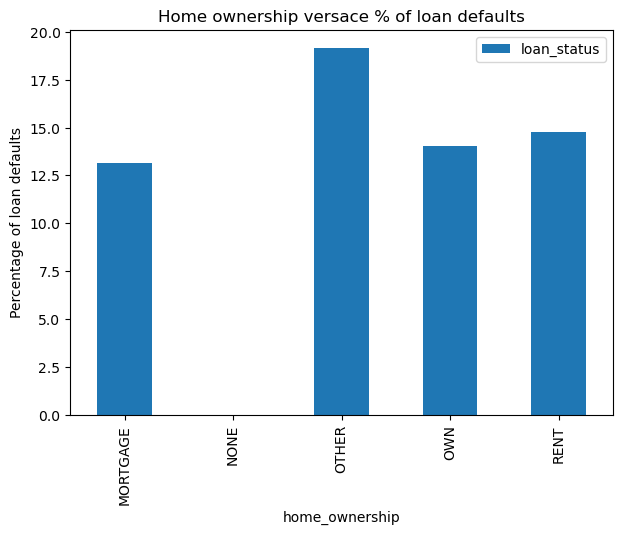

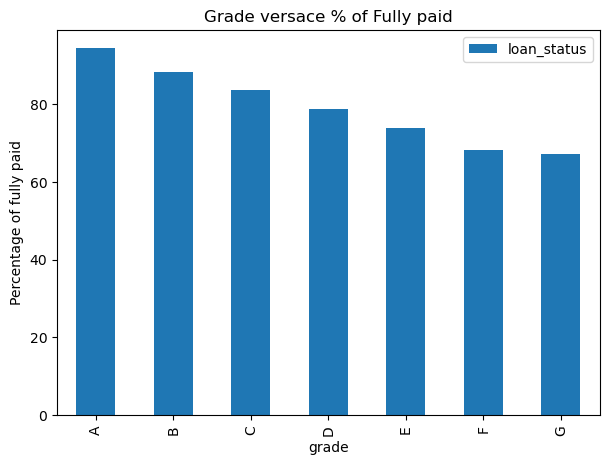

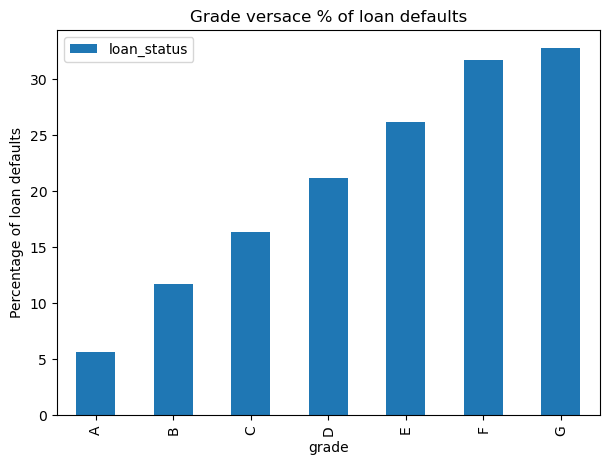

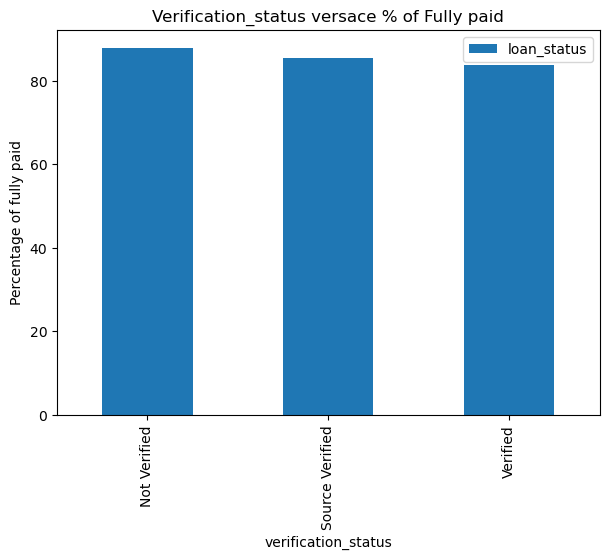

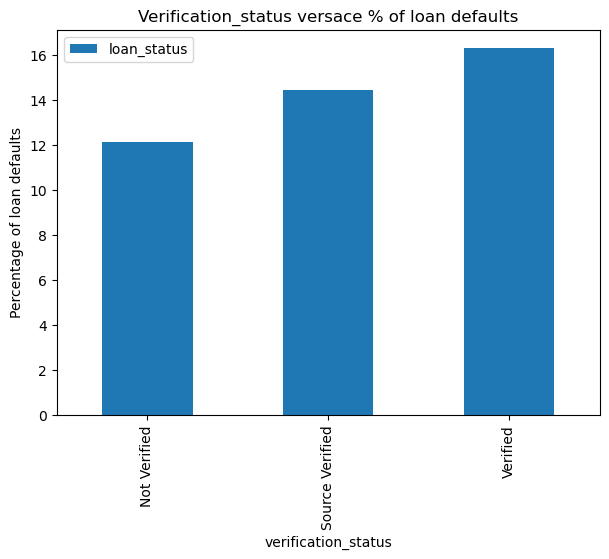

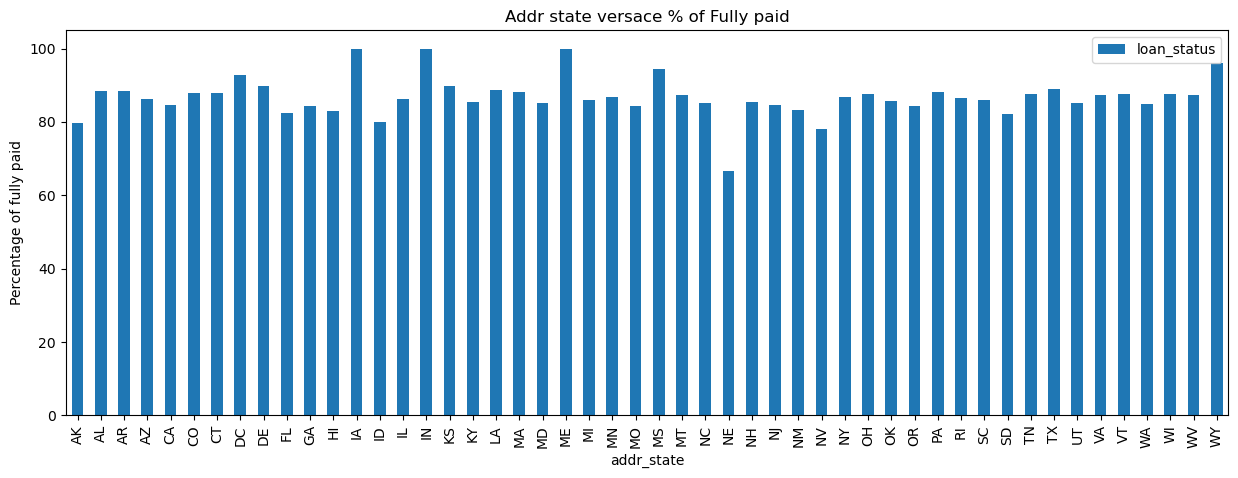

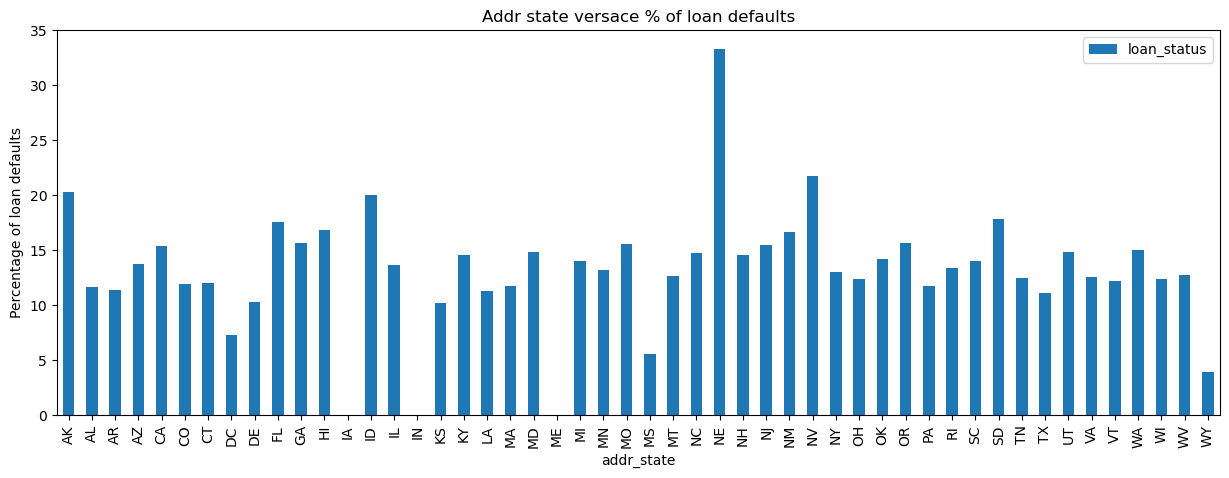

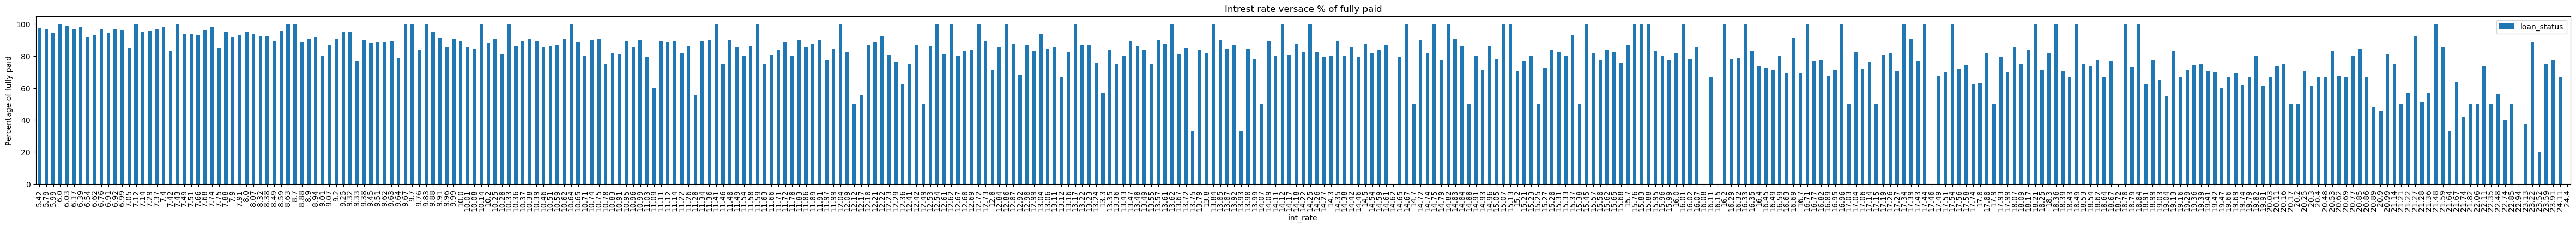

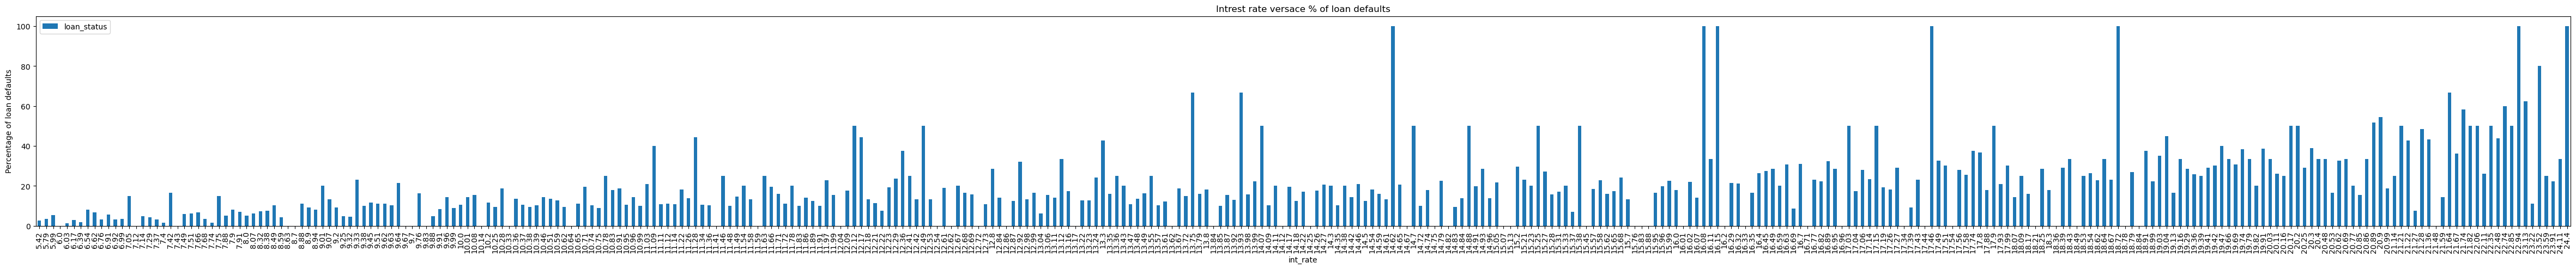

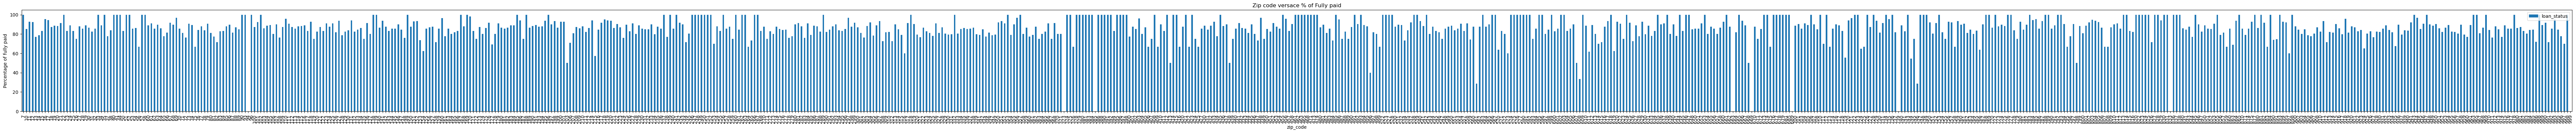

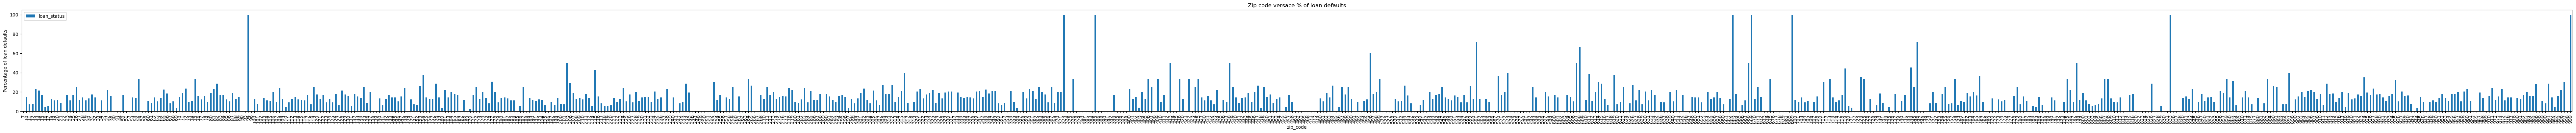

C:\Users\G50-70\AppData\Local\Temp\ipykernel_8956\3740109710.py:306: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


loan_amnt :  False
installment :  False
int_rate :  False
funded_amnt :  False
funded_amnt_inv :  False
emp_length :  False
dti :  False
Outliers detected? False
(37049, 53)


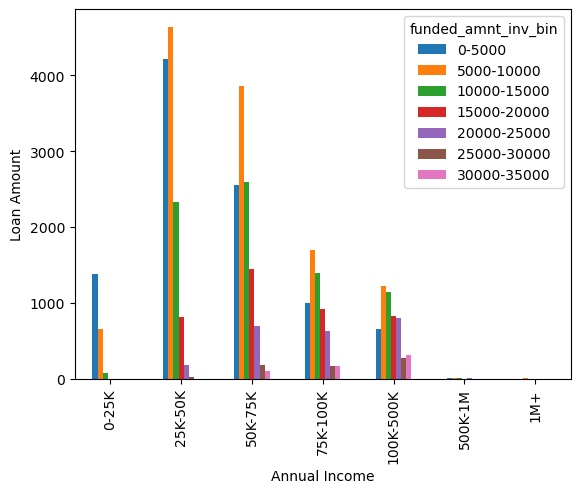

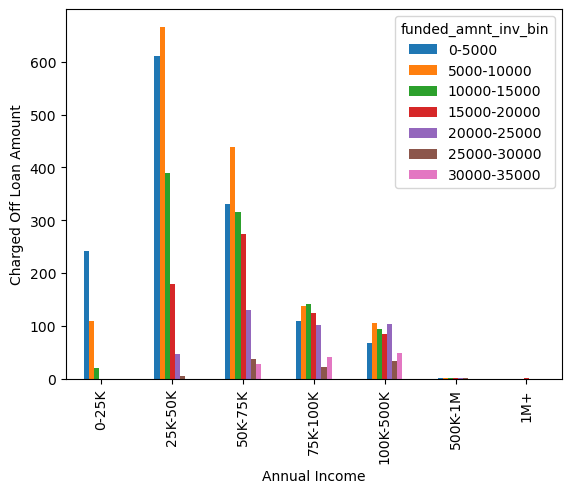

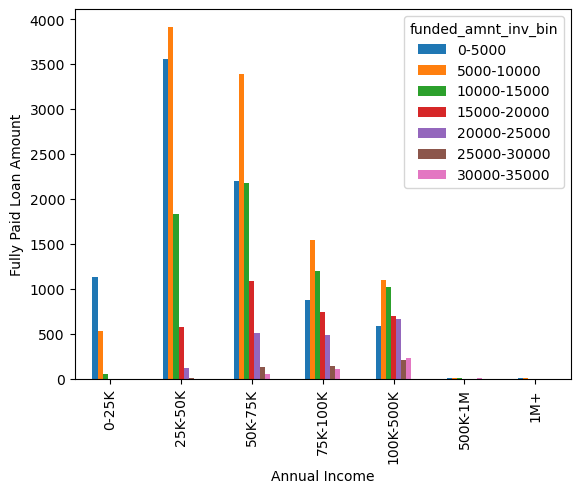

In [5]:
#Import the libraries needed for Lending CLub Case study analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re


# function to find the columns where all values are NaN
def find_column_with_all_NaN (df):
  nan_lst = [x for x in df.columns if len(df.index) == df[x].isnull().sum()]
  return nan_lst
       
#Deletes the given list of columns and modifies the dataframe accordingly
def del_columns_from_dataframe(df, del_lst) : 
  df.drop(del_lst, axis=1, inplace = True)

#Funtion to find the list of columns with more than/equlals to 90%  NaN values 
def find_column_with_90percent_or_more_NaN (df):
  list_90percent = [x for x in df.columns if((df[x].isnull().sum() / len(df.index))*100) >= 90]     
  return list_90percent

#Funtion to extract lenth from string
def convert_emp_len(emp_len) :
  emp_len = re.findall('(\d+)', emp_len) #emp_len.astype('str').str.extractall('(\d+)') 
  return(emp_len)

#def func_percent(arg1):
#  return((arg1['loan_status'].count()/len(arg1.index))*100)

#Function to plot a grap of bivariate variable 
def plot_bivariate_percentage(df, values, index, loan_stat, title1, ylabel1,figsize1) : 
  #p_table = pd.pivot_table(df, values, index, aggfunc=lambda x: (len(x[x == loan_stat]))/len(x[x != 'Current'])*100)
  p_table = pd.pivot_table(df, values, index, aggfunc=lambda x: (len(x[x == loan_stat])/len(x[x != 'Current']))*100 if len(x[x != 'Current'])!= 0 else 0 )
  p_table.plot(kind="bar", ylabel = ylabel1, title=title1, figsize=figsize1)
  plt.xticks(horizontalalignment="center")

    
#Read the data set for the case study 
club_case_study_df = pd.read_csv('C:\\Users\\G50-70\\Downloads\\CaseStudys\\LendingClubCaseStudy\\loan\\loan.csv', low_memory=False)

#Get the information on data set

#Print shape of dataframe to know number of columns and rows
print("Shape of dataframe : {}".format( club_case_study_df.shape) )

#Print few rows of the data set
print("Printing few rows of the data set : \n ", club_case_study_df.head())

#Print info to find data types of each column
print("Printing input of info function : \n" , club_case_study_df.info())

#Use describe method to get high level give of the data set
print("Printing the output of Describe funtion : \n",club_case_study_df.describe())

#Print columns in the dataframme
print("Printing all columns of the dataframe \n", club_case_study_df.columns)

#Printing number of missing values per column
print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

#From analysis missing values many columns have all missing values and find list of columns with NaN values
nan_column_lst = find_column_with_all_NaN(club_case_study_df)

#Drop the columans with all Nan
del_columns_from_dataframe(club_case_study_df, nan_column_lst)
print("Number of columns with all NaN vlaues : {}".format(len(nan_column_lst)))
print("Shape of data frame after dropping columnus with all NaN : {} \n".format(club_case_study_df.shape))

#Find columns with 90% or more of NaN values
list_90 = find_column_with_90percent_or_more_NaN(club_case_study_df)
#Delete columns with 90 0r more percent of NaN values
del_columns_from_dataframe(club_case_study_df, list_90)
print("Number of columns with all 90% or more NaN vlaues : {}".format(len(list_90)))
print("Shape of data frame after dropping columnus with 90% or more NaN : {} \n".format(club_case_study_df.shape))

#Print number of missing values per column after removing columns with more than 90% values missing
print("Number of missing values per column after droping columns : \n", club_case_study_df.isnull().sum(), "\n")

#print desc column to anylsis the data as this column has many missing valyes
print("Printing Desc : \n", club_case_study_df["desc"].head())
# desc column will not be used for loan decision also just description hence droping 
del_columns_from_dataframe(club_case_study_df, 'desc')
#club_case_study_df.drop('desc', axis =1, inplace=True)

# Column 'mths_since_last_delinq' has more than 64% missing values. 
print("\nPrinting mths_since_last_delinq with non missing values")
print(club_case_study_df[club_case_study_df["mths_since_last_delinq"].isnull() == False]["mths_since_last_delinq"].tail())
# Either we can drop or impute the missing values. 
#Decided to impute with zero for all mising values  

print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")
print("Employee title , employee lenght \n", club_case_study_df[['emp_title', 'emp_length']].head())
#Drop row with emp__lengh as NaN
club_case_study_df = club_case_study_df[club_case_study_df['emp_length'].isnull() == False]
#Drop rows were emp_tite is NaN as it is different impute title and NaN are less
club_case_study_df = club_case_study_df[club_case_study_df['emp_title'].isnull() == False]
#print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

#print "collections_12_mths_ex_med" and "" columns for analysis
print(club_case_study_df[ ['collections_12_mths_ex_med','chargeoff_within_12_mths']  ].tail())
club_case_study_df = club_case_study_df[club_case_study_df['collections_12_mths_ex_med'].isnull() == False]
#print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

print(club_case_study_df['pub_rec_bankruptcies'][-150 : -140])

#Will impute missing values with zero as many values are zero
club_case_study_df['pub_rec_bankruptcies'].fillna(0, inplace = True)

#Fill mths_since_last_delinq with zero for missing value as many are missing.
club_case_study_df['mths_since_last_delinq'].fillna(0, inplace = True)

#Will drop rowa wherw  "last_pymnt_d" and "revol_util" are NaN as these have negligible in number 
club_case_study_df = club_case_study_df[club_case_study_df['last_pymnt_d'].isnull() == False]
club_case_study_df = club_case_study_df[club_case_study_df['revol_util'].isnull() == False]

print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")


#Now we handled all missing values. Now will move analyze and correct data tupe of columns
#print(club_case_study_df.info())

# term, int_rate and zip_code should not be object. Let us inspect the values 
print("Term   and int_rate \n", club_case_study_df[['term', 'int_rate', 'zip_code']].head())
club_case_study_df['term'] = club_case_study_df['term'].apply(lambda x : int(x.rstrip(" months")))
club_case_study_df['int_rate'] = club_case_study_df['int_rate'].apply(lambda x : pd.to_numeric(x.rstrip("%")))
club_case_study_df['zip_code'] = club_case_study_df['zip_code'].apply(lambda x : int(x.rstrip("xx")))

# Looks grade, sub_grade, emp_lenght should not be objact, Print to analyze
#print("Grade  Sub_grade  and emp_lenght\n", club_case_study_df[['grade', 'sub_grade', 'emp_length']].head())

#club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : convert_emp_len(x))
club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : re.findall('(\d+)' , str(x))[0])
club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : pd.to_numeric(x))

#Remove % from revol_util column
club_case_study_df['revol_util'] = club_case_study_df['revol_util'].apply(lambda x : pd.to_numeric(x.rstrip("%")))
print("Printing emp_length and revol_util after correcting type \n", club_case_study_df[['emp_length', 'revol_util']])
#Print remaining columns which of object type for analysis
print(club_case_study_df[['earliest_cr_line','initial_list_status', 'pymnt_plan', 'application_type', 'last_credit_pull_d']].head())


print("Print 'initial_list_status' with values other than f")
print(club_case_study_df[club_case_study_df['initial_list_status']!='f']['initial_list_status'])

print("Print 'pymnt_plan' with values other than n")
print(club_case_study_df[club_case_study_df['pymnt_plan']!='n']['pymnt_plan'])

#From this looks all values are initial_list_status are f and pymnt_plan are n, 
#hence drop the both columns
#lst_del is hold columns to be deleted
lst_del = ['initial_list_status', 'pymnt_plan']

print(club_case_study_df.head())
#print(club_case_study_df.info())
print(club_case_study_df.shape)
#print(club_case_study_df.describe())

#From output of describe, some columns have all zeros as values. Hence we will drop these columns
# Columns 'policy_code' has all ones, hence droping it
lst_del.extend(['policy_code','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'collections_12_mths_ex_med'])
print("List of columns getting deleted : \n", lst_del)
del_columns_from_dataframe(club_case_study_df, lst_del)
print(club_case_study_df.info())
print(club_case_study_df.describe())

#Splitting issue_d into issue_month,issue_year to get more meaningful analysis
club_case_study_df['issue_month'] = club_case_study_df['issue_d'].apply(lambda x:x.split('-')[0])
club_case_study_df['issue_year'] = club_case_study_df['issue_d'].apply(lambda x:x.split('-')[1])
club_case_study_df['issue_year'] = club_case_study_df['issue_year'].apply(lambda x:(int(x) + 2000))

#Splitting last_pymnt_d into month and year to get more meaningful analysi
club_case_study_df['last_pymnt_month'] = club_case_study_df['last_pymnt_d'].apply(lambda x:str(x).split('-')[0])
club_case_study_df['last_pymnt_year'] = club_case_study_df['last_pymnt_d'].apply(lambda x:str(x).split('-')[1])
club_case_study_df['last_pymnt_year'] = club_case_study_df['last_pymnt_year'].apply(lambda x:(int(x) + 2000))


#Arranging the columns into Categorical, Continous, Extra for further analysis
categorical = ['purpose', 'term','grade','sub_grade','home_ownership','verification_status','loan_status']
continuous = ['loan_amnt','installment','int_rate','funded_amnt','funded_amnt_inv','emp_length','dti']
extra = ['id','member_id','emp_title','title','addr_state','inq_last_6mths','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med']
'                   '

#Histogram for univariate analysis - categorical variables
print("Histogram for for univariate analysis - categorical variables" )
for i in categorical:
  sns.countplot(x=club_case_study_df[i])
  plt.xticks(rotation=90)
  plt.show()

#Histogram for univariate analysis - continuous variables
print(print("Histogram for for univariate analysis - categorical variables" ))
for i in continuous:
    sns.histplot(club_case_study_df[i])
    plt.xticks(rotation=90)
    plt.show()
    
    
    
#Seaborn plot for analysing loan status and grade
sns.countplot(x="loan_status", data=club_case_study_df, palette="mako_r")
plt.show()

sns.countplot(x='grade', data=club_case_study_df, palette="bwr")
plt.xlabel("Grade")
plt.show()

#Creating seperate data frames for Fully_Paid and Charged_Off loans
fully_paid=club_case_study_df[(club_case_study_df.loan_status=="Fully Paid")]
charged_off=club_case_study_df[(club_case_study_df.loan_status=="Charged Off")]
print('Shape of fully paid : \n', fully_paid.shape)
print('Shape of charged_off : \n', charged_off.shape)
#Print number of loan defaulters and % of loan defautler
print("Number loan defaulters : {}  % loa defaulters : {} ".format(len(charged_off.index), ((len(charged_off.index)/len(club_case_study_df.index))*100) ))

#Analysing fully paid loans based on purpose using pivot table
plot_bivariate_percentage(club_case_study_df,'loan_status', "purpose", 'Fully Paid', "Purpose versace % of Fully paid", "Percentage of fully paid", (7,5))

#Analysing loan defaults based on purpose using pivot table
plot_bivariate_percentage(club_case_study_df,'loan_status', "purpose", 'Charged Off', "Purpose versace % of loan defaults", "Percentage of loan defaults", (7,5))

#Analysing loan fully pain based on the home ownership using pivot table
plot_bivariate_percentage(club_case_study_df,'loan_status', "home_ownership", 'Fully Paid', "Home ownership versace % of Fully paid", "Percentage of fully paid", (7,5))

#Analysing loan defaults based on the home ownership using pivot table
plot_bivariate_percentage(club_case_study_df,'loan_status', "home_ownership", 'Charged Off', "Home ownership versace % of loan defaults", "Percentage of loan defaults", (7,5))

#Analysing the pattern of fully paid  loans on various grades
plot_bivariate_percentage(club_case_study_df,'loan_status', "grade", 'Fully Paid', "Grade versace % of Fully paid", "Percentage of fully paid", (7,5))

#Analysing the pattern of charged off loans on various grades
plot_bivariate_percentage(club_case_study_df,'loan_status', "grade", 'Charged Off', "Grade versace % of loan defaults", "Percentage of loan defaults", (7,5))            

#Analysing the pattern of fully paid  loans on various verification status
plot_bivariate_percentage(club_case_study_df,'loan_status', "verification_status", 'Fully Paid', "Verification_status versace % of Fully paid", "Percentage of fully paid", (7,5))

#Analysing the pattern of charged off loans on various grades
plot_bivariate_percentage(club_case_study_df,'loan_status', "verification_status", 'Charged Off', "Verification_status versace % of loan defaults", "Percentage of loan defaults", (7,5))

#Analysing the pattern of fully paid  loans on various Address state
plot_bivariate_percentage(club_case_study_df,'loan_status', "addr_state", 'Fully Paid', "Addr state versace % of Fully paid", "Percentage of fully paid", (15,5))

#Analysing the loan defaults on various Intrest rates
plot_bivariate_percentage(club_case_study_df,'loan_status', "addr_state", 'Charged Off', "Addr state versace % of loan defaults","Percentage of loan defaults", (15,5))

#Analysing the pattern of fully paid  loans on various Intrest rates
plot_bivariate_percentage2(club_case_study_df,'loan_status', "int_rate", 'Fully Paid', "Intrest rate versace % of fully paid","Percentage of fully paid",(60, 4))

#Analysing the loan defaults on various Address state
plot_bivariate_percentage2(club_case_study_df,'loan_status', "int_rate", 'Charged Off', "Intrest rate versace % of loan defaults","Percentage of loan defaults",(60, 5))


#Analysing the pattern of fully paid  loans on various zip code
plot_bivariate_percentage2(club_case_study_df,'loan_status', "zip_code", 'Fully Paid', "Zip code versace % of Fully paid", "Percentage of fully paid",(100, 4))

#Analysing the pattern of charged off loans on various grades
plot_bivariate_percentage2(club_case_study_df,'loan_status', "zip_code", 'Charged Off', "Zip code versace % of loan defaults","Percentage of loan defaults",(100, 4))


#creating bins for values as the range is very high

#creating bin for funded_amnt_inv
club_case_study_df["funded_amnt_inv"].describe()
bin_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000', '25000-30000','30000-35000']
bins = [-1, 5000, 10000, 15000, 20000,25000,30000,35000]
club_case_study_df['funded_amnt_inv_bin'] = pd.cut(club_case_study_df['funded_amnt_inv'], bins=bins, labels=bin_labels)


#creating bin for int_rate
club_case_study_df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
club_case_study_df['int_rate_bin'] = pd.cut(club_case_study_df['int_rate'], bins=bins, labels=bin_labels)


#creating bin for annual_income
club_case_study_df.annual_inc.describe()
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)


#Analysing the annual_income and its impact on loan
raw_table=pd.pivot_table(club_case_study_df, index='funded_amnt_inv_bin',columns='annual_inc_bin',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Loan Amount', xlabel='Annual Income')

loan_default=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]
raw_table=pd.pivot_table(loan_default, index='funded_amnt_inv_bin',columns='annual_inc_bin',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Charged Off Loan Amount', xlabel='Annual Income')

loan_defaulted=club_case_study_df[club_case_study_df.loan_status == "Fully Paid"]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_bin',columns='annual_inc_bin',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Fully Paid Loan Amount', xlabel='Annual Income')

#Outlier Analysis
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(club_case_study_df, col)}")
    outliers.append(check_outlier(club_case_study_df, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

#Removing outliers
replace_with_thresholds(club_case_study_df, "annual_inc")
print(club_case_study_df.shape)


#Data Correlation check
#sns.set_style(style="darkgrid")
#print(club_case_study_df.corr()['annual_inc'])
#corr = club_case_study_df.corr()
#plt.figure(figsize=(10,10))
#sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
#            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#            annot=True, annot_kws={"size": 11}, square=True);
#plt.show()

#From output it clear that member_id and id are not repeated

#By looking at both columns data, both have NaN values in same rows, hence decided to drop 


#data_dictionary_df = pd.read_excel("C:\\Users\\G50-70\\Downloads\\CaseStudys\\LendingClubCaseStudy\\Data_Dictionary.xlsx")
#data_dictionary = data_dictionary_df.to_dict()
#print(data_dictionary)


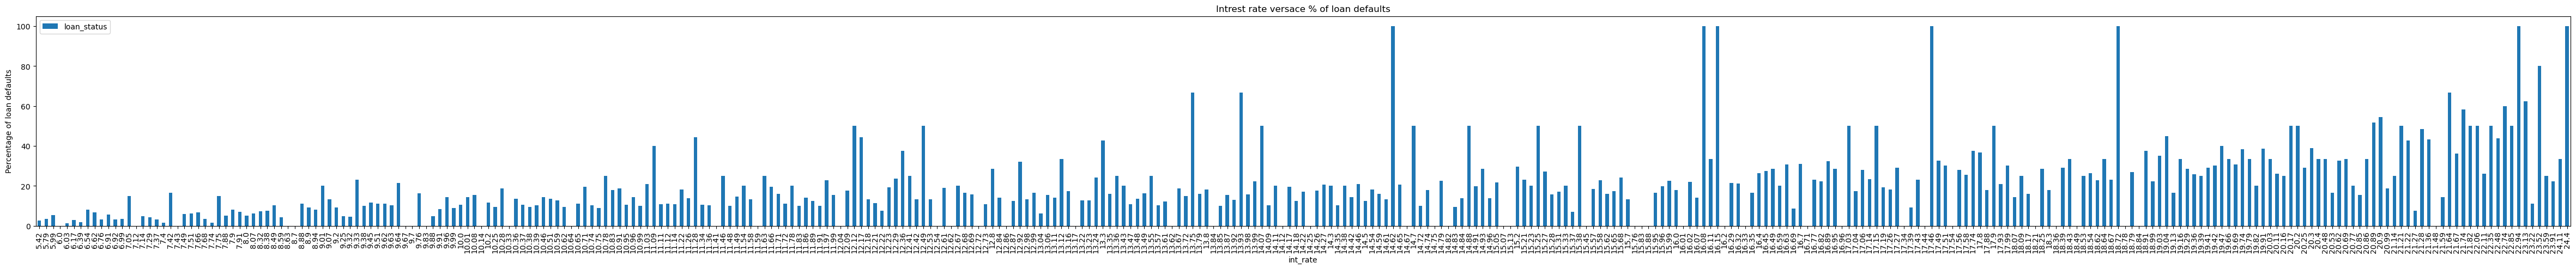

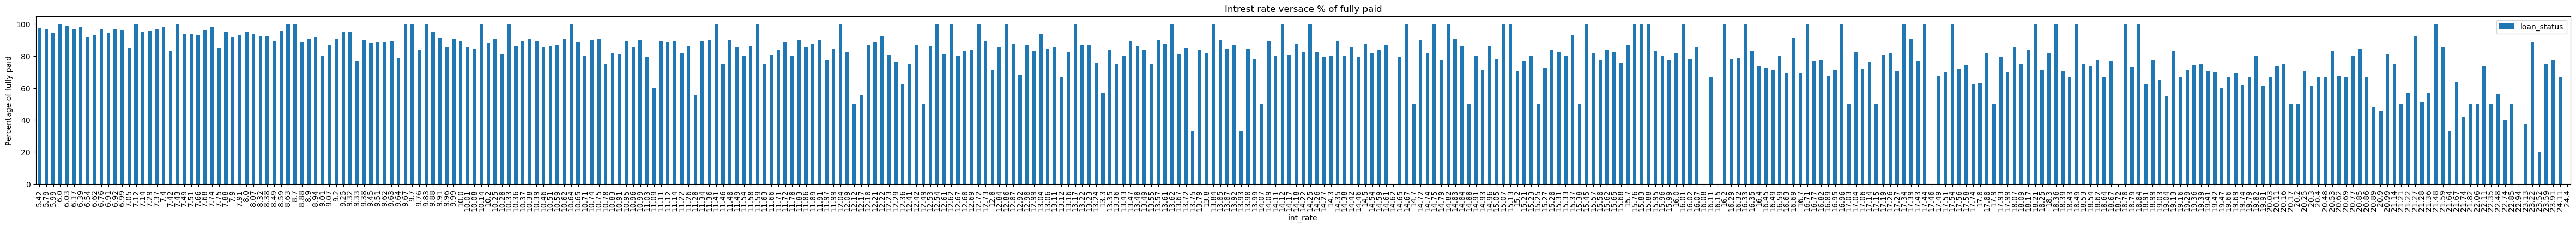

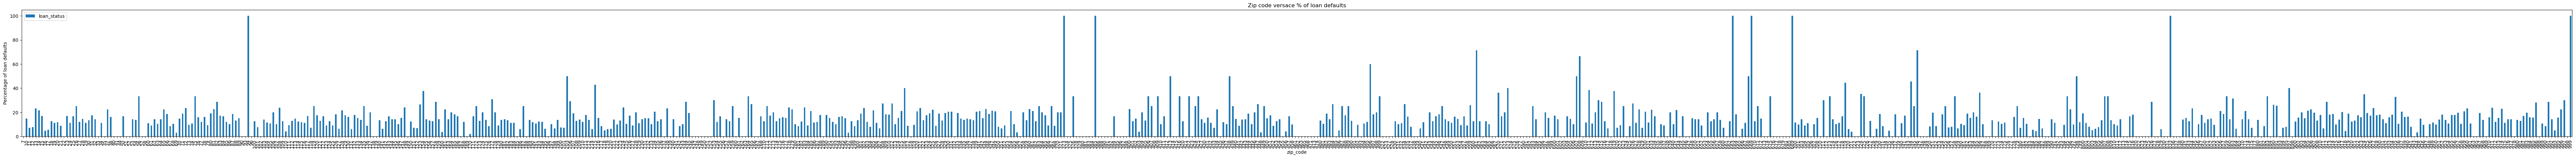

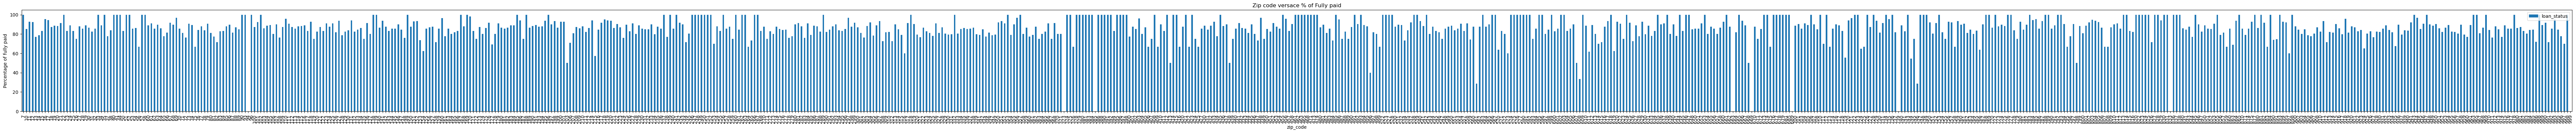

In [4]:
#Analysis bivariate variable where we need to drop plot on big figure

def plot_bivariate_percentage2(df, values, index, loan_stat, title1, ylabel1, figsize1) : 
  p_table = pd.pivot_table(df, values, index, aggfunc=lambda x: (len(x[x == loan_stat])/len(x[x != 'Current']))*100 if len(x[x != 'Current'])!= 0 else 0 )
  p_table.plot(kind="bar", ylabel = ylabel1, title=title1, figsize=figsize1)
  plt.xticks(horizontalalignment="center")
  plt.show()
  

plot_bivariate_percentage2(club_case_study_df,'loan_status', "int_rate", 'Charged Off', "Intrest rate versace % of loan defaults","Percentage of loan defaults",(60, 5))
plot_bivariate_percentage2(club_case_study_df,'loan_status', "int_rate", 'Fully Paid', "Intrest rate versace % of fully paid","Percentage of fully paid",(60, 4))

plot_bivariate_percentage2(club_case_study_df,'loan_status', "zip_code", 'Charged Off', "Zip code versace % of loan defaults","Percentage of loan defaults",(100, 5))
plot_bivariate_percentage2(club_case_study_df,'loan_status', "zip_code", 'Fully Paid', "Zip code versace % of Fully paid", "Percentage of fully paid",(100, 4))

<AxesSubplot:title={'center':'int rate versus % of loan defaults'}, xlabel='Intrest rate bin', ylabel='Percentage of loan defauts'>

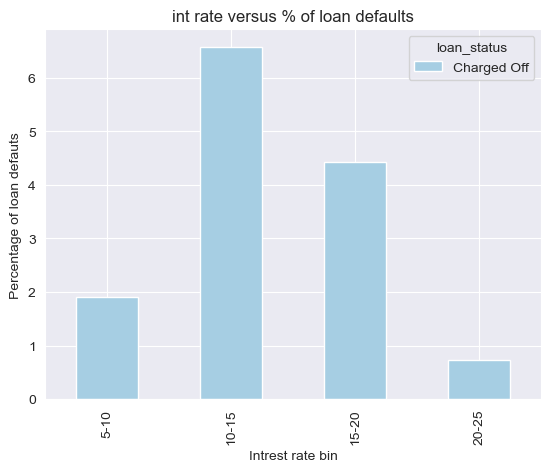

In [172]:
#Analysing the default loan vs Int rate
club_case_study_df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
club_case_study_df['int_rate_bin'] = pd.cut(club_case_study_df['int_rate'], bins=bins, labels=bin_labels)

loan_default=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]

raw_table=pd.pivot_table(loan_default, index='int_rate_bin',columns='loan_status',values='int_rate',aggfunc=lambda x:round(x.count()/len(club_case_study_df.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of loan defauts', xlabel='Intrest rate bin', colormap = 'Paired',title = "int rate versus % of loan defaults")





<AxesSubplot:title={'center':'int rate versus % of Fully Paid'}, xlabel='Intrest rate bin', ylabel='Percentage of fully Paid'>

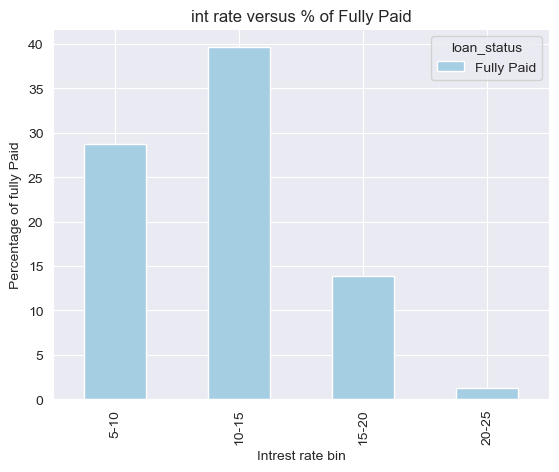

In [250]:
#Analysing the Fully paid loan vs Int rate
club_case_study_df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
club_case_study_df['int_rate_bin'] = pd.cut(club_case_study_df['int_rate'], bins=bins, labels=bin_labels)

fully_paid=club_case_study_df[club_case_study_df.loan_status == "Fully Paid"]

raw_table=pd.pivot_table(fully_paid, index='int_rate_bin',values='int_rate', columns='loan_status', aggfunc=lambda x:round(x.count()/len(club_case_study_df.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of fully Paid', xlabel='Intrest rate bin', colormap = 'Paired',title = "int rate versus % of Fully Paid")



<AxesSubplot:title={'center':'annual inc versus % of Fully Paid'}, xlabel='annual income', ylabel='Percentage of Fully Paid'>

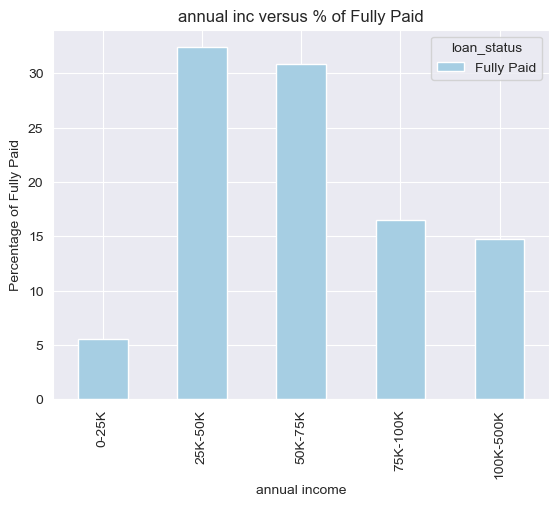

In [168]:
#Analysing the annual_income and its impact on fully paid members

bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)

fully_paid=club_case_study_df[club_case_study_df.loan_status == "Fully Paid"]

raw_table=pd.pivot_table(fully_paid, index='annual_inc_bin',columns='loan_status',values='annual_inc',aggfunc=lambda x:round(x.count()/len(fully_paid.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of Fully Paid', xlabel='annual income', colormap = 'Paired',title = "annual inc versus % of Fully Paid")



<AxesSubplot:title={'center':'annual inc versus % of Defaulters'}, xlabel='annual income', ylabel='Percentage of defaults'>

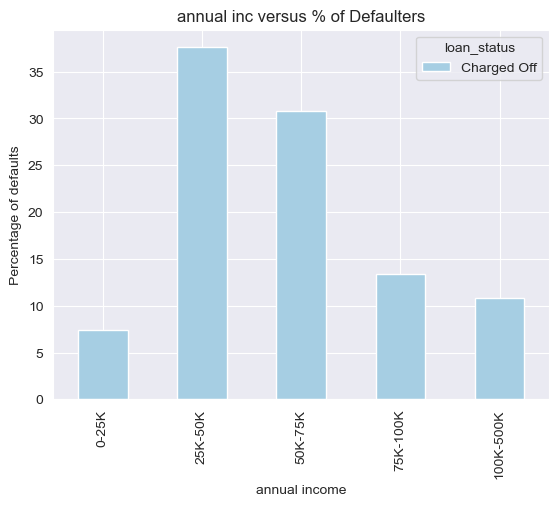

In [200]:
#Analysing the annual_income and its impact on defaulters=
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)
charged_off=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]
raw_table=pd.pivot_table(charged_off, index='annual_inc_bin',columns='loan_status',values='annual_inc',aggfunc=lambda x:round(x.count()/len(charged_off.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of defaults', xlabel='annual income', colormap = 'Paired',title = "annual inc versus % of Defaulters")


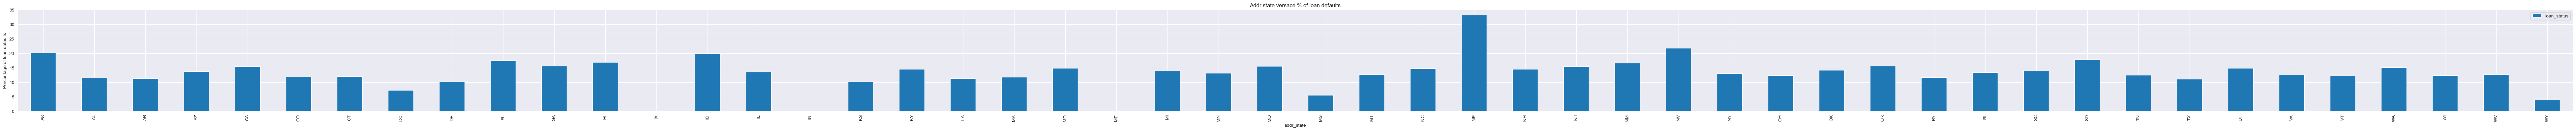

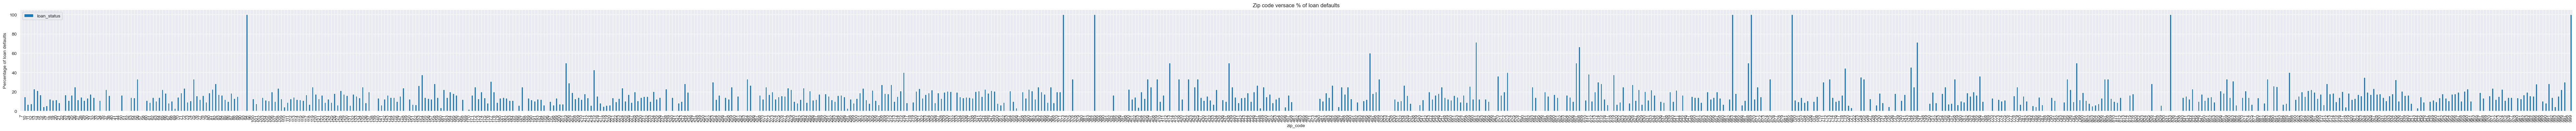

In [362]:
def plot_bivariate_percentage2(df, values, index, loan_stat, title1, ylabel1, figsize1) : 
  p_table = pd.pivot_table(df, values, index, aggfunc=lambda x: (len(x[x == loan_stat])/len(x[x != 'Current']))*100 if len(x[x != 'Current'])!= 0 else 0 )
  p_table.plot(kind="bar", ylabel = ylabel1, title=title1, figsize=figsize1)
  plt.xticks(horizontalalignment="center")
  plt.show()
  
#plot_bivariate_percentage2(club_case_study_df,'loan_status', "purpose", 'Charged Off', "Purpose versace % of loan defaults","Percentage of loan defaults")
#plot_bivariate_percentage2(club_case_study_df,'loan_status', "purpose", 'Fully Paid', "Purpose versace % of Fully paid", "Percentage of fully paid")
plot_bivariate_percentage2(club_case_study_df,'loan_status', "addr_state", 'Charged Off', "Addr state versace % of loan defaults","Percentage of loan defaults",figsize=(15, 4))
#plot_bivariate_percentage2(club_case_study_df,'loan_status', "addr_state", 'Fully Paid', "Addr state versace % of Fully paid", "Percentage of fully paid")
plot_bivariate_percentage2(club_case_study_df,'loan_status', "zip_code", 'Charged Off', "Zip code versace % of loan defaults","Percentage of loan defaults",figsize=(100, 4))



In [363]:
def plot_bivariate_percentage1(df, values, index, columns, loan_stat, title1, ylabel1, xlabel1) : 
  p_table = pd.pivot_table(df, values,index,  aggfunc=lambda x: (len(x[x == loan_stat]))/len(x[x != 'Current'])*100 )
  #p_table = pd.pivot_table(club_case_study_df, values = 'loan_status', index = 'zip_code', aggfunc=lambda x: (len(x[x =='Charged Off'])/len(x[x != 'Current']))*100 if (len(x[x != 'Current']) !=0 ) else 0)
  #p_table = pd.pivot_table(df, values,index, columns, aggfunc=lambda x: print(x))
  print(p_table)
  p_table.style.hide(axis = "columns")
  p_table.plot(kind="bar", ylabel = ylabel1, xlabel= xlabel1, title=title1, figsize=(100, 4))
  plt.xticks(horizontalalignment="center")
  plt.show()

#Analysing the annual_income and its impact on defaulters=
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)

#charged_off=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]
#raw_table=pd.pivot_table(charged_off, index='annual_inc_bin',columns='loan_status',values='annual_inc',aggfunc=lambda x:round(x.count()/len(charged_off.index),4)*100)
#raw_table=pd.pivot_table(charged_off, index='annual_inc_bin',columns='loan_status',values='annual_inc',aggfunc=lambda x:round(x.count()/len(charged_off.index),4)*100)
#raw_table.style.hide(axis = "columns")
#raw_table.plot(kind='bar', ylabel='Percentage of defaults', xlabel='annual income', colormap = 'Paired',title = "annual inc versus % of Defaulters")
#print(raw_table)
plot_bivariate_percentage1(club_case_study_df, 'loan_status','annual_inc', 'annual_inc_bin', 'Charged Off', "Interest rate versace % of loan defaults","Percentage of loan defaults", 'Interest rates')
#plot_bivariate_percentage1(club_case_study_df,'loan_status', 'int_rate', 'loan_status', 'Fully Paid', "Interest rate versace % of fully paid","Percentage of fully paid", 'Interest rates')



ZeroDivisionError: division by zero